In [1]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

In [2]:
def get_theta(prob):
    """
        Returns a theta angle which puts |0> in the desired probability
    """
    assert prob <= 1 and prob >= 0, "Invalid probability"
    return 2 * np.arccos(np.sqrt(prob))

In [3]:
N_QUBITS = 4

In [4]:
device = qml.device("lightning.qubit", wires=N_QUBITS, shots=1000)
#device_gpu = qml.device("lightning.gpu", wires=4, shots=1000)

In [5]:
qubits_range = list(range(N_QUBITS))

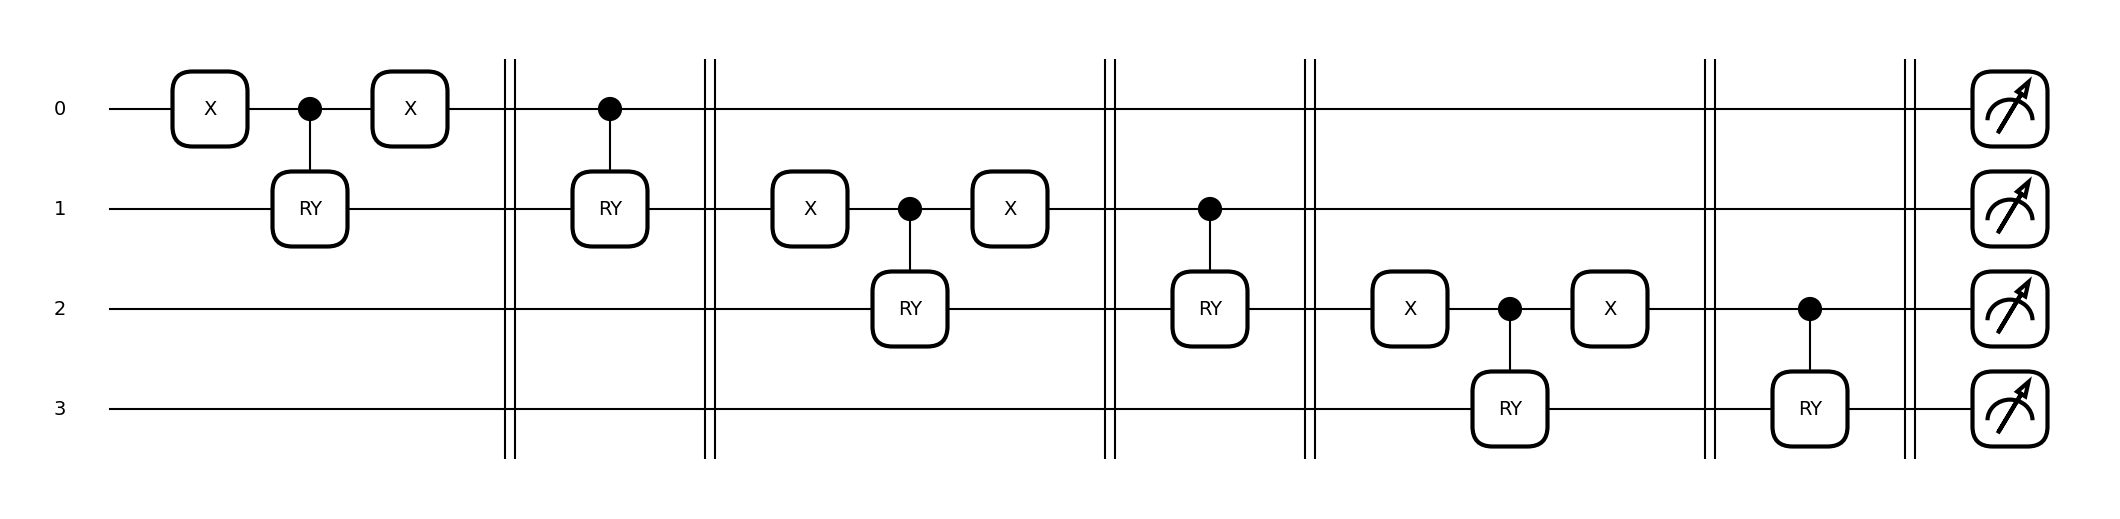

In [6]:
@qml.qnode(device)
def circuit():
    qml.X(wires=[0])
    qml.CRY(get_theta(0.4), wires=[0, 1])
    qml.X(wires=[0])

    qml.Barrier(only_visual=True, wires=qubits_range)
    
    qml.CRY(get_theta(0.3), wires=[0, 1])
    
    qml.Barrier(only_visual=True, wires=qubits_range)
    
    qml.X(wires=[1])
    qml.CRY(get_theta(0.8), wires=[1, 2])
    qml.X(wires=[1])

    qml.Barrier(only_visual=True, wires=qubits_range)

    qml.CRY(get_theta(0.5), wires=[1, 2])

    qml.Barrier(only_visual=True, wires=qubits_range)

    qml.X(wires=[2])
    qml.CRY(get_theta(0.65), wires=[2,3])
    qml.X(wires=[2])

    qml.Barrier(only_visual=True, wires=qubits_range)

    qml.CRY(get_theta(0.25), wires=[2,3])

    qml.Barrier(only_visual=True, wires=qubits_range)
    
    return qml.counts(wires=qubits_range)


qml.draw_mpl(circuit)()
plt.show()

In [7]:
results = circuit()

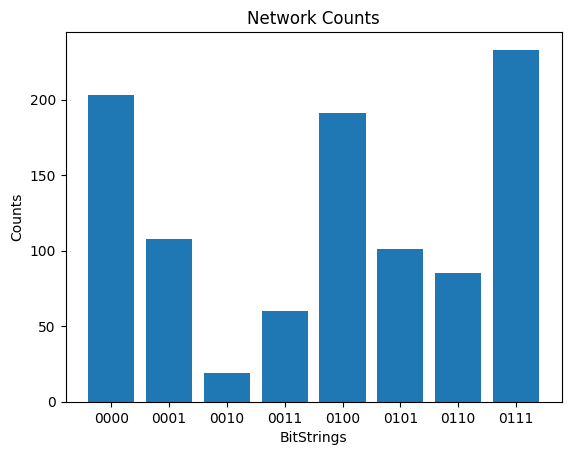

In [8]:
x = list(results.keys())
y = list(results.values())

plt.bar(x, y)
plt.title("Network Counts")
plt.ylabel("Counts")
plt.xlabel("BitStrings")
plt.show()